## 1D Linear Convection

This is step one of '12 Steps to Navier Stokes'.

We solve the equation:

$$ \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0 $$

Which with some simple math is discretised to:

$$ u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n - u_{i-1}^n) $$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys
%matplotlib inline

### Grid

In [2]:
x_len = 10
num_x = 101
del_x = x_len / (num_x - 1)
num_t = 400
del_t = 0.025
c = 1

### Initial Conditions

We need to set up our initial conditions, which are $ u = 1 $ everywhere except for $ 0.5 <= x <= 1 $ where $ u = 2 $

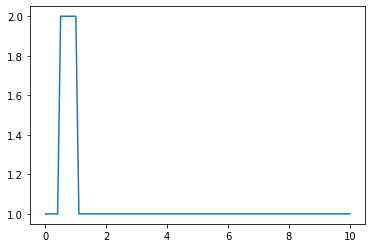

In [3]:
u = np.ones(num_x)
u[int(0.5 / del_x) : int(1 / del_x + 1)] = 2
plt.plot(np.linspace(0, x_len, num_x), u)

### Solving

We calculate the values of $ u $ on the grid for incrementing time steps until t=10

(0.0, 2.0)

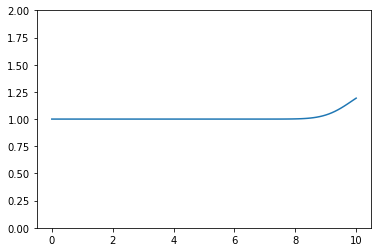

In [4]:
for n in range(num_t):
    u_n = u.copy()
    for i in range(1, num_x):
        u[i] = u_n[i] - c * (del_t / del_x) * (u_n[i] - u_n[i-1])
        
plt.plot(np.linspace(0, x_len, num_x), u)
plt.ylim(0, 2)

### Animation

This section probably won't work if you're viewing on GitHub.

Let's see if we can animate the movement of the wave and tidy everything up a little.
First, we need to generate the figure that our animation will be created on:

Text(0.5, 1.0, '1D Linear Convection from t=0 to t=10')

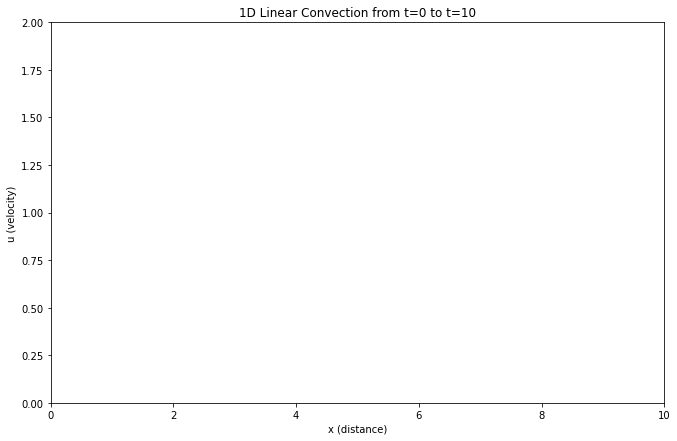

In [5]:
from matplotlib import animation, rc
from IPython.display import HTML

#generate the figure
figure, axes = plt.subplots()
figure.set_size_inches(11, 7)
axes.set_xlim(0, x_len)
axes.set_ylim(0, 2)
line, = axes.plot([], [], lw=2)
plt.xlabel('x (distance)')
plt.ylabel('u (velocity)')
plt.title('1D Linear Convection from t=0 to t=10')

We can then plot the evolution of the waveform over time until 10 seconds has passed:

In [6]:
#reset the initial condition
u = np.ones(num_x)
u[ int(0.5 / del_x) : int(1 / del_x - 1) ] = 2

#animation initialisation function
def initialise_anim():
    line.set_data([], [])
    return (line,)

#animation function which calculates u
#we can remove the outer time loop since this will be handled by the animation library
def animate(j):
    x = np.linspace(0, x_len, num_x)
    u_n = u.copy()
    for i in range(1, num_x):
        u[i] = u_n[i] - c * (del_t/del_x) * (u_n[i] - u_n[i-1])
    line.set_data(x, u)
    return (line,)

#finally, run the animation
anim = animation.FuncAnimation(figure, animate, init_func=initialise_anim, frames=num_t, interval=20)
HTML(anim.to_jshtml())